In [2]:
#이진 분류나, 다중 분류나, 상황에 따라 쓰는 함수들이 다르다.

#다중분류는 CrossEntropyLoss, NLLLoss, LogSoftmax 등이 있다.
#CrossEntropyLoss: NLLLoss + LogSoftmax
#NLLLoss => 정답에 원핫 인코딩 후 cross entropy 계산.
#LogSoftmax => 모델 추정 결과에 softmax를 처리한 뒤 cross entropy를 계산한다.
#다중 분류는 class의 수가 얼마나 되는지 파악해서, 그것을 토대로 처리를 하면 된다잉.

#이진 분류
# output layer의 출력 unit 개수가 1개이다.(positive일 확률을 구하는 경우가 높다.)
# 출력의 activation 함수: Sigmoid(Logistic) 함수
# loss 함수 : Binary crossentropy(BCELoss)
# MSE,RMSE, R square(평균으로 예측하는 것 대비 얼마나 성능이 좋은지에 관한 점수.)


#분류의 평가지표(각자가 약간은 미묘하게 다르다. 그러니 이 정의를 잘 파악하도록 하자.)
#정확도(Accuracy)   - 맞은 것의 개수 / 전체개수
#재현율/민감도(Recall) - positive중에 맞은 것의 개수 / positive 의 개수 (이는 이진분류평가지표이다.) 
#정밀도(Precision) - 모델이 positive로 예측한 것 중 맞은 것의 개수 / 모델이 positive로 예측한 전체의 개수
#재현율과 정밀도의 차이는 '예측'의 차이라고 생각을 할 수 있다.





# 모델 저장

- 학습한 모델을 저장장치에 파일로 저장하고 나중에 불러와 사용(추가 학습, 예측 서비스) 할 수 있도록 한다. 
- 파이토치는 모델의 파라미터만 저장하는 방법과 모델 구조와 파라미터 모두를 저장하는 두가지 방식을 제공한다.
- 저장 함수
    - `torch.save(저장할 객체, 저장경로)`
- 보통 저장파일의 확장자는 `pt`나 `pth` 를 지정한다.

## 모델 전체 저장하기 및 불러오기

- 저장하기
    - `torch.save(model, 저장경로)`
- 불러오기
    - `load_model = torch.load(저장경로)`
- 저장시 **pickle**을 이용해 직렬화하기 때문에 불어오는 실행환경에도 모델을 저장할 때 사용한 클래스가 있어야 한다.



## 모델의 파라미터만 저장
- 모델을 구성하는 파라미터만 저장한다.
- 모델의 구조는 저장하지 않기 때문에 불러올 때 **모델을 먼저 생성하고 생성한 모델에 불러온 파라미터를 덮어씌운다.**
- 모델의 파라미터는 **state_dict** 형식으로 저장한다.

### state_dict
- 모델의 파라미터 Tensor들을 레이어 단위별로 나누어 저장한 Ordered Dictionary (OrderedDict)
- `모델객체.state_dict()` 메소드를 이용해 조회한다.
- 모델의 state_dict을 조회 후 저장한다.
    - `torch.save(model.state_dict(), "저장경로")`
- 생성된 모델에 읽어온 state_dict를 덮어씌운다.
    - `new_model.load_state_dict(torch.load("state_dict저장경로"))`


In [1]:
#한마디로, 저장할 것을 dict형식으로 저장을 하라는 이야기이다.

# Checkpoint를 저장 및 불러오기
- 학습이 끝나지 않은 모델을 저장 후 나중에 이어서 학습시킬 경우에는 모델의 구조, 파라미터 뿐만 아니라 optimizer, loss 함수등 학습에 필요한 객체들을 저장해야 한다.
- Dictionary에 필요한 요소들을 key-value 쌍으로 저장후 `torch.save()`를 이용해 저장한다.(이런 것을 checkpoint 라고 한다.)
```python
# 저장
torch.save({
    'epoch':epoch,
    'model_state_dict':model.state_dict(),
    'optimizer_state_dict':optimizer.state_dict(),
    'loss':train_loss
}, "저장경로")

# 불러오기
# 모델과 optimizer를 새롭게 생성하고, 저장한 저장경로의 것을 load해 오면 된다.
model = MyModel()
optimizer = optim.Adam(model.parameter(),lr=0.001)

checkpoint = torch.load("저장경로")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

#### 이어학습
model.train()
#### 추론
model.eval()

```

In [3]:
import torch
import torch.nn as nn



#단순하게 생각해서, 객체 안에 모듈이 들어가 있다고 생각하면 된다.
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.lr = nn.Linear(784,64)
        self.out = nn.Linear(64,10)
        self.relu = nn.ReLU()
        
        
        
        
        
        #이런 흐름에 따라서 데이터가 정리가 된다.
    def forward(self,X):
        X = torch.flatten(X,start_dim=1)
        X = self.lr(X) #self.lr에 값을 입력하고, 그 값을 다시 가져갈 것이다.
        X = relu(X)
        X = out(X)
        return X
        
        
    

In [12]:
sample_model = Network() #모델 생성


In [13]:
#모델 구조 + 파라미터
torch.save(sample_model,"경로/sample_model.pth")

FileNotFoundError: [Errno 2] No such file or directory: '경로/sample_model.pth'

In [14]:
## 모델의 파라미터만 저장 -> model.state_dict(): 파라미터들만 조회한다.



state_dict  =sample_model.state_dict()
print(type(state_dict)) #orderedDict : 순서를 유지하는 dictionary
state_dict.keys() #키값들만 조회


<class 'collections.OrderedDict'>


odict_keys(['lr.weight', 'lr.bias', 'out.weight', 'out.bias'])

In [15]:

#다양한 값들을 보도록 하자.
lr_weight = state_dict['lr.weight']
lr_bias = state_dict['lr.bias']
lr_weight.shape, lr_bias.shape

(torch.Size([64, 784]), torch.Size([64]))

In [16]:
lr_weight = state_dict['out.weight']
lr_bias = state_dict['out.bias']
lr_weight.shape, lr_bias.shape

(torch.Size([10, 64]), torch.Size([10]))

In [17]:
lr_bias #값을 출력한다.

tensor([-0.0353,  0.0067,  0.0639, -0.1071,  0.0629,  0.0887, -0.0594,  0.1086,
        -0.0553,  0.0206])

In [18]:
### 파라미터 저장
#주의: 여러번 저장하면안된다. 오류난다.
import os
#os.makedirs('models/sample')


#torch.save(state_dict, "models/sample/sample_state_dict.pth")




In [19]:
##파라미터 로드



load_state_dict = torch.load("models/sample/sample_state_dict.pth")
load_state_dict.keys()


odict_keys(['lr.weight', 'lr.bias', 'out.weight', 'out.bias'])

In [20]:
load_state_dict['out.bias'] #값을 출력한다.

tensor([-0.1146,  0.0596, -0.0638, -0.0289,  0.1136,  0.1118,  0.0705,  0.0064,
         0.0513,  0.0966])

In [21]:
#새로 모델객체를 생성한다. 

new_model = Network()
#파라미터들을 매칭한다.
new_model.load_state_dict(load_state_dict) #매칭! 만약 잘 되면 매칭이 잘 되었다고 결과가 뜬다.



<All keys matched successfully>

# 문제 유형별 MLP 네트워크
- MLP(Multi Layer Perceptron)
    - Fully Connected Layer로 구성된 네트워크

# Regression(회귀)


- 그냥 값을 예측하는 것이다.예측할 값이 정해져 있지 않은 경우이다. => 연속형 값을 추론하는 경우이다. 정답이 될 수 있는 경우는 무한대이다.
- 정답이 될 수 있는 것이 정해져 있는 것과는 정 반대이다.

## Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율
<br><br>
- **Target**
    - MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)---우리나라의 주택 평균 가격 정도.

In [10]:
!pip install scikit-learn

In [11]:
#import 구문 따로 설정하기.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import torch
import torch.nn as nn
from torch.utils.data import TensorDataset,DataLoader
import torchinfo


#이렇게 import 하는 구문을 따로 두는 것이 중요하다.


device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


## Dataset, DataLoader 생성

In [22]:
#데이터를 읽는다.

boston =  pd.read_csv('data/boston_hosing.csv') #이름을 유의하자....
print(boston.shape)
boston.info()




(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [23]:
boston.head() #맨 위의 5개를 출력해볼까?





,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
#x(input data,features),y(output data,target,label)을 분리한다.



#왜 MEDV를 기준으로 target 을 설정했는지 잘 생각해보면 안다.
X_boston = boston.drop(columns="MEDV").values #컬럼을 제거한다.
y_boston = boston['MEDV'].to_frame().values #to_frame을 통해 dataframe으로 데이터를 가져 올 수 있다. values 메소드도 잘 파악할 것.

y_boston #shape을 통해 데이터가 총 몇개인지 알 수 있다.

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [25]:
##trainset/testset을 분리
#8:2로 데이터를 분리한다.
X_train, X_test, y_train, y_test = train_test_split(X_boston,
                                                    y_boston,
                                                    test_size=0.2,
                                                   random_state=0
                                                   )#이 함수는 scikit-learn에 있다. 
#random_state는 seed 값을 고정시켜서 섞이는 순서를 동일하게 한다.

#회귀(정답이 연속형-다 다른 값)는 stratify=y를 설정하지 않는다.





#설정한 대로 데이터가 잘 구분이 된 것을 알 수 있다.
#숫자들을 잘 보면, 대강 8:2로 데이터들이 나뉘어져 있다는 것을 볼 수 있다.
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)




(404, 13) (102, 13) (404, 1) (102, 1)


In [26]:
#feature scaling =>컬럼들의 scaling을 맞춰주는 작업이다.

#단순히 값의 크기에 따라 모델링이 되지 않도록 처리한다. 약간 다듬는 과정이라고 보면 된다..


#예시: 200과 2가 있다면 당연히 200이 더 크다. 근데 200CM랑 2KM는?
#이런 예시가 있기 때문에, 다듬는 과정이 필요하다고 볼 수 있다.

#뭐 0부터 255까지의 범위를 0~1까지로 조정하는 것을 feature scaling의 예시라고 볼 수 있다.


#StandardScaler => 모든 컬럼의 척도를 평균 0, 표준편차 1로 맞춘다. 뭐 간단하게 조정하는 것이다.
#Feature sacling은 train set의 평균과 표준편차를 이용해 train set/test set의 값들에 적용한다.


X_train_mean = X_train.mean(axis=0) #컬럼별 평균. axis를 잘 보도록하자.
X_train_std = X_train.std(axis=0) #컬럼별 표준편차.


X_train_scaled_raw = (X_train - X_train_mean)/X_train_std
#각원소값-평균/표준편차=표준점수



In [27]:
X_train_scaled_raw.mean(axis=0) #평균이 거의 0이라고 볼 수 있다. 10의 -14승 정도이니 ㅋㅋ

array([-2.33174316e-16, -6.23813432e-17,  2.69916103e-15, -3.95723058e-17,
       -9.89857261e-16, -1.47571724e-15,  8.65918998e-16,  2.00884414e-16,
       -1.18716917e-16,  2.91296140e-17,  1.65098958e-14,  7.99759049e-15,
       -1.85852434e-15])

In [28]:
X_train_scaled_raw.std(axis=0) #표편이 모두 1인 것을 목격할 수 있다.

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
#Sklearn을 이용해 Standard Scaling 처리

scaler = StandardScaler()
scaler.fit(X_train) #어떻게 변환할지 학습을 한다. ->평균과 표준편차를 계산한다.
X_train_scaled = scaler.transform(X_train) #변환.
X_test_scaled = scaler.transform(X_test) #X_train의 평균/표준편차 기준으로 testset도 변환한다.(모델을 좀 더 정확히 평가하기 위함이다.)


# 메소드를 이용해서 더 간단히 코딩을 한 버전이다.


In [37]:
X_train_mean = X_train_scaled.mean(axis=0) #컬럼별 평균. axis를 잘 보도록하자.
X_train_std = X_train_scaled.std(axis=0) #컬럼별 표준편차.
X_train_std

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
#train set: 모델을 학습한다. ===>이전 데이터를 대표하는 샘플이다.
#test set: 모델을 평가한다. ==>앞으로 예측할 데이터를 대표하는 샘플이다.



In [39]:
#X,y : ndarray => torch.Tensor로 변환

X_train_scaled = torch.tensor(X_train_scaled,dtype=torch.float32)
X_test_scaled = torch.tensor(X_test_scaled,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)

<ipython-input-39-6a0baa4ea347>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train,dtype=torch.float32)
<ipython-input-39-6a0baa4ea347>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test,dtype=torch.float32)


In [40]:
#Dataset 생성
boston_trainset = TensorDataset(X_train_scaled,y_train)
boston_testset = TensorDataset(X_test_scaled,y_test)

print("Dataset의 데이터 개수:",len(boston_trainset),len(boston_testset))
boston_trainset[0]

Dataset의 데이터 개수: 404 102


(tensor([-0.3726, -0.4996, -0.7049,  3.6645, -0.4249,  0.9357,  0.6937, -0.4372,
         -0.1622, -0.5617, -0.4846,  0.3717, -0.4110]),
 tensor([26.7000]))

In [41]:
#DataLoader 생성

boston_trainloader = DataLoader(boston_trainset,batch_size=200,shuffle=True,drop_last=True) #drop_last를 통해 '몫'이 아닌 '나머지'들을 정리해 낼 수 있다.

boston_testloader = DataLoader(boston_testset,batch_size=len(boston_testset)) #나중에 사이즈가 바뀌더라도 잘 할 수 있도록 len으로 설정한다.


print("epoch당 step수:",len(boston_trainloader),len(boston_testloader)) 

epoch당 step수: 2 1


### 모델정의

In [42]:
#dataset이랑 dataloader를 생성했으니, 이제 모델을 정의해야 한다.




class BostonModel(nn.Module):
    
    
    def __init__(self):
        #nn.Module의 __init__() 실행 =>초기화
        super().__init__()
        #forward propagation(예측) 할 때 필요한 layer들을 생성한다.
        
        
        self.lr1 = nn.Linear(in_features=13,out_features=32) #13은 우리가 하는 예시의 데이터의 수이다.
        #입력이 13이고 출력이 32라는 것은 weight를 13*32짜리를 만들겠다는 것이다.
        self.lr2 = nn.Linear(32,16) #들어가는 것이 32이니까 나가는 것을 약수인 16으로 설정.(사실 무슨 값으로 해도 무방하긴 하다.)
        ##lr3을 출력 layer로 만든다. out_features를 지정해야 하는데, 이는 모델이 출력해야 할 값의 개수에 맞춰준다.
        self.lr3 = nn.Linear(16,1) # 최종적으로 1개를 출력한다. 집값 하나를 예측해야 하기 때문이다.
        
        
        
        
        
        
    def forward(self,X):
        out = self.lr1(X) #선형
        out = nn.ReLU()(out) #비선형 #lr1을 한 다음 relu함수에 이를 집어 넣는다. relu객체를 생성한 다음, 그 안에다 넣는 것이다.
        out = self.lr2(out)#선형
        out = nn.ReLU()(out)#비선형 #다시 한번 relu를 쓴다.
        
        out=self.lr3(out) #출력 레이어(이 값이 모델의 예측값이 된다.)
        #회귀의 출력결과에는 activation 함수를 정의하지 않는다. 
        # 예외: 출력값의 범위가 정해져 있고 그 범위값을 출력하는 함수가 있는 경우에는 예외이다.
        # 범위: 0~1 -> logistic (nn.sigmoid())
        #        -1~1 -> tanh(nn.Tanh())
        
        
        return out #out을 최종적으로 return 한다.
    

In [44]:
#모델 생성

boston_model = BostonModel()

#모델 구조 확인

print(boston_model)

BostonModel(
  (lr1): Linear(in_features=13, out_features=32, bias=True)
  (lr2): Linear(in_features=32, out_features=16, bias=True)
  (lr3): Linear(in_features=16, out_features=1, bias=True)
)


In [45]:
#모델 구조 확인
#모델, 입력데이터의 shape(batch_size,features)
torchinfo.summary(boston_model,(100,13))


#param은 weight와 bias의 개수를 합친 것이다.

Layer (type:depth-idx)                   Output Shape              Param #
BostonModel                              [100, 1]                  --
├─Linear: 1-1                            [100, 32]                 448
├─Linear: 1-2                            [100, 16]                 528
├─Linear: 1-3                            [100, 1]                  17
Total params: 993
Trainable params: 993
Non-trainable params: 0
Total mult-adds (M): 0.10
Input size (MB): 0.01
Forward/backward pass size (MB): 0.04
Params size (MB): 0.00
Estimated Total Size (MB): 0.05

### 학습(train)



In [51]:
#학습 + 검증



boston_model = boston_model.to(device) #모델: 1. 생성 2. device를 설정
#loss 함수 정의 - 회귀: mse
loss_fn = nn.MSELoss()

#하이퍼파라미터(우리가 설정함.) 정의
LR=0.001
N_EPOCH =1000

#optimizer를 정의한다.
optimizer = torch.optim.RMSprop(boston_model.parameters(),lr=LR)   #torch.optim 모듈에 최적화알고리즘들이 정의되어 있다. (모델의 파라미터, 학습률)
#최적화할 대상이 boston_model의 파라미터들임을 알려준다.





In [52]:
#에폭별 학습 결과를 저장할 리스트
##train loss와 validation loss를 저장한다. (valid는 학습 중에 성능을 체크하는 것이기 때문이다.)


train_loss_list =[]
valid_loss_list =[]


In [53]:
import time
##train(학습/훈련)
## 두 단계 ->Train+Validation => step 별로 train => epoch 별로 검증한다.


s=time.time() #시간을 알려주는 함수이다.

for epoch in range(N_EPOCH):
    
    # 한 epoch에 대한 train 코드
    
    ########################################
    # train - 모델을 train mode로 변경한다.
    ########################################
    boston_model.train() #train 모드로 변경
    train_loss = 0.0 #현재 epoch의 train_loss를 저장할 변수

    ### batch 단위로 학습 =>step
    for X,y in boston_trainloader:
        # 한 step에 대한 train 코드
        # 1. X,y를 device로 옮긴다. =>모델과 동일한 device에 위치시켜야 한다.
        X,y =X.to(device), y.to(device)
        #2.모델 추정(예측) =>forward propagation
        pred = boston_model(X)
        
        
        #3. loss 계산,파라미터 초기화
        loss = loss_fn(pred,y) #오차 계산 ->grad_fn 
        optimizer.zero_grad()
        #4.back propagation ->파라미터들의 gradient값들을 계산한다.
        loss.backward() #loss에 대한 모든 parameter들에 대한 gradient를 계산한다. ---- 변수의 grad 속성에 저장.
        
        
        #5. 파라미터 업데이트 
        optimizer.step()
        
        #이렇게 하면 weight,bias가 업데이트가 된다.
        
        
        #6.현 step의 loss를 train_loss에 누적한다.
        train_loss += loss.item()
    #train_loss의 전체 평균을 계산한다. step수로 나눠서 전체 평균을 계산한다.
    train_loss /= len(boston_trainloader) #step수로 나누기.
    
    
    
        
    ######################################
    # validation - 모델을 평가(eval) mode로 변경
    #            - 검증,평가,서비스를 할 때.
    #          -validation/test dataset으로 모델을 평가한다.
    ######################################
    boston_model.eval() #평가 모드로 변경
    
    
    # 검증 loss를 저장할 변수
    valid_loss= 0.0
    #검증은 gradient 계산할 필요가 없음. forward propagation시 도함수를 구할 필요가 없다.
    
    
    with torch.no_grad():
        for X_valid,y_valid in boston_testloader:
            #1.device로 이동한다.
            X_valid,y_valid = X_valid.to(device),y_valid.to(device)
            
            #2.모델을 이용해 예측
            pred_valid = boston_model(X_valid)
            #3. 평가 -MSE
            valid_loss += loss_fn(pred_valid,y_valid).item()
        
        #반복문을 빠져 나오면, 검증셋에 대한 것이 끝난것이다.
        # valid_loss 평균
        valid_loss /=len(boston_testloader)
        
    # 현 epcoh에 대한 학습 결과 로그를 출력한다. +list에 추가.
    print(f"[{epoch+1}/{N_EPOCH}]  train loss: {train_loss:.4f},valid loss: {valid_loss:.4f}")
    train_loss_list.append(train_loss)
    valid_loss_list.append(valid_loss)
    
    
e = time.time()            
    
    
#코드를 다시 한번 한 호흡에 실행을 해 보면, train loss와 valid loss가 둘 다 줄어들고 있음을 알 수 있다.


[1/1000]  train loss: 6.2860,valid loss: 21.0379
[2/1000]  train loss: 4.6088,valid loss: 19.0763
[3/1000]  train loss: 3.8892,valid loss: 18.8754
[4/1000]  train loss: 3.6911,valid loss: 18.4967
[5/1000]  train loss: 3.6581,valid loss: 18.5264
[6/1000]  train loss: 3.5510,valid loss: 17.8601
[7/1000]  train loss: 3.7504,valid loss: 18.6694
[8/1000]  train loss: 3.6733,valid loss: 18.0838
[9/1000]  train loss: 3.6567,valid loss: 17.7966
[10/1000]  train loss: 3.6592,valid loss: 17.9446
[11/1000]  train loss: 3.5374,valid loss: 18.3578
[12/1000]  train loss: 3.5152,valid loss: 18.2789
[13/1000]  train loss: 3.4969,valid loss: 18.1138
[14/1000]  train loss: 3.5304,valid loss: 18.2971
[15/1000]  train loss: 3.6085,valid loss: 17.9911
[16/1000]  train loss: 3.5844,valid loss: 18.1177
[17/1000]  train loss: 3.5072,valid loss: 18.2706
[18/1000]  train loss: 3.4079,valid loss: 18.3489
[19/1000]  train loss: 3.5051,valid loss: 18.2322
[20/1000]  train loss: 3.4913,valid loss: 18.4439
[21/1000]

[182/1000]  train loss: 2.9880,valid loss: 19.2417
[183/1000]  train loss: 2.9724,valid loss: 19.1345
[184/1000]  train loss: 2.9895,valid loss: 19.0715
[185/1000]  train loss: 2.9960,valid loss: 18.6945
[186/1000]  train loss: 2.8705,valid loss: 19.1521
[187/1000]  train loss: 3.0109,valid loss: 19.2679
[188/1000]  train loss: 3.0100,valid loss: 19.3463
[189/1000]  train loss: 2.9728,valid loss: 19.1377
[190/1000]  train loss: 2.9469,valid loss: 19.1441
[191/1000]  train loss: 2.9724,valid loss: 19.2521
[192/1000]  train loss: 2.9964,valid loss: 19.2550
[193/1000]  train loss: 2.9698,valid loss: 19.0559
[194/1000]  train loss: 2.9744,valid loss: 19.1525
[195/1000]  train loss: 2.9606,valid loss: 19.1869
[196/1000]  train loss: 2.9355,valid loss: 19.0809
[197/1000]  train loss: 2.9028,valid loss: 19.1760
[198/1000]  train loss: 2.9767,valid loss: 18.8369
[199/1000]  train loss: 2.9725,valid loss: 19.5057
[200/1000]  train loss: 3.1458,valid loss: 19.3850
[201/1000]  train loss: 2.9340,

[359/1000]  train loss: 2.8700,valid loss: 19.8406
[360/1000]  train loss: 2.7289,valid loss: 20.3658
[361/1000]  train loss: 2.6308,valid loss: 19.8547
[362/1000]  train loss: 2.6614,valid loss: 19.7527
[363/1000]  train loss: 2.6008,valid loss: 20.0322
[364/1000]  train loss: 2.5545,valid loss: 19.7372
[365/1000]  train loss: 2.6167,valid loss: 19.6785
[366/1000]  train loss: 2.6925,valid loss: 19.7181
[367/1000]  train loss: 2.6776,valid loss: 19.6525
[368/1000]  train loss: 2.5785,valid loss: 19.7701
[369/1000]  train loss: 2.6178,valid loss: 19.7506
[370/1000]  train loss: 2.6174,valid loss: 19.7645
[371/1000]  train loss: 2.6278,valid loss: 20.1315
[372/1000]  train loss: 2.6858,valid loss: 19.7699
[373/1000]  train loss: 2.7149,valid loss: 20.1685
[374/1000]  train loss: 2.6354,valid loss: 19.7272
[375/1000]  train loss: 2.6668,valid loss: 19.7267
[376/1000]  train loss: 2.6532,valid loss: 20.0194
[377/1000]  train loss: 2.7267,valid loss: 20.3981
[378/1000]  train loss: 2.6121,

[520/1000]  train loss: 2.3892,valid loss: 20.4464
[521/1000]  train loss: 2.4128,valid loss: 20.6798
[522/1000]  train loss: 2.3921,valid loss: 20.4435
[523/1000]  train loss: 2.3958,valid loss: 20.7096
[524/1000]  train loss: 2.3890,valid loss: 20.4747
[525/1000]  train loss: 2.3776,valid loss: 20.3636
[526/1000]  train loss: 2.3646,valid loss: 20.9188
[527/1000]  train loss: 2.3601,valid loss: 20.6361
[528/1000]  train loss: 2.4439,valid loss: 20.6743
[529/1000]  train loss: 2.3592,valid loss: 20.3677
[530/1000]  train loss: 2.4202,valid loss: 20.6521
[531/1000]  train loss: 2.3167,valid loss: 20.4343
[532/1000]  train loss: 2.4294,valid loss: 20.9991
[533/1000]  train loss: 2.4432,valid loss: 20.6696
[534/1000]  train loss: 2.3883,valid loss: 20.8237
[535/1000]  train loss: 2.6097,valid loss: 21.1081
[536/1000]  train loss: 2.4209,valid loss: 20.5158
[537/1000]  train loss: 2.4911,valid loss: 20.4574
[538/1000]  train loss: 2.3890,valid loss: 20.5385
[539/1000]  train loss: 2.5016,

[686/1000]  train loss: 2.2004,valid loss: 21.0554
[687/1000]  train loss: 2.2152,valid loss: 21.8943
[688/1000]  train loss: 2.3393,valid loss: 21.4705
[689/1000]  train loss: 2.1299,valid loss: 21.3549
[690/1000]  train loss: 2.1777,valid loss: 20.8482
[691/1000]  train loss: 2.1772,valid loss: 21.5893
[692/1000]  train loss: 2.1837,valid loss: 21.0855
[693/1000]  train loss: 2.1704,valid loss: 21.1740
[694/1000]  train loss: 2.1769,valid loss: 21.3657
[695/1000]  train loss: 2.1803,valid loss: 21.2770
[696/1000]  train loss: 2.2709,valid loss: 20.9118
[697/1000]  train loss: 2.2669,valid loss: 21.1327
[698/1000]  train loss: 2.1729,valid loss: 21.2697
[699/1000]  train loss: 2.1488,valid loss: 21.4179
[700/1000]  train loss: 2.1725,valid loss: 21.3860
[701/1000]  train loss: 2.1844,valid loss: 21.3324
[702/1000]  train loss: 2.2730,valid loss: 21.4076
[703/1000]  train loss: 2.2229,valid loss: 21.6590
[704/1000]  train loss: 2.1833,valid loss: 21.2557
[705/1000]  train loss: 2.1963,

[849/1000]  train loss: 2.0318,valid loss: 21.8177
[850/1000]  train loss: 1.9960,valid loss: 22.0223
[851/1000]  train loss: 2.0274,valid loss: 21.7848
[852/1000]  train loss: 1.9886,valid loss: 22.0749
[853/1000]  train loss: 1.9988,valid loss: 21.4724
[854/1000]  train loss: 2.0626,valid loss: 22.0061
[855/1000]  train loss: 2.0367,valid loss: 21.8161
[856/1000]  train loss: 2.0002,valid loss: 21.5526
[857/1000]  train loss: 2.0324,valid loss: 21.6133
[858/1000]  train loss: 2.0952,valid loss: 21.4744
[859/1000]  train loss: 1.9728,valid loss: 22.0322
[860/1000]  train loss: 2.0715,valid loss: 21.5733
[861/1000]  train loss: 1.9938,valid loss: 21.7336
[862/1000]  train loss: 2.0107,valid loss: 21.7084
[863/1000]  train loss: 1.9606,valid loss: 21.8799
[864/1000]  train loss: 2.0738,valid loss: 21.6873
[865/1000]  train loss: 2.0335,valid loss: 21.6242
[866/1000]  train loss: 1.9333,valid loss: 21.7256
[867/1000]  train loss: 2.0077,valid loss: 21.7020
[868/1000]  train loss: 2.0070,

걸린 시간: 9.640349864959717 초


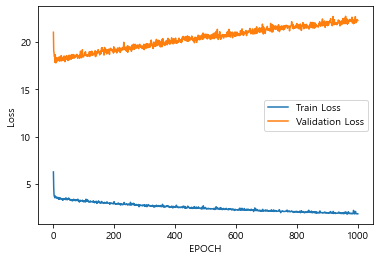

In [54]:
print("걸린 시간:",(e-s),"초")


#이렇게 데이터가 적은 예제는, 걸린 시간이 그렇게 길지 않다. 그래서 시간차를 비교하는 것이 적합하지 않을 지도 모른다.




#train loss, valid loss의 epoch별 변화의 흐름을 시각화하자.

plt.plot(range(1,N_EPOCH+1),train_loss_list,label="Train Loss")
plt.plot(range(1,N_EPOCH+1),valid_loss_list,label="Validation Loss")




#그래프를 통해 값의 추세를 알 수 있다.
plt.xlabel("EPOCH")
plt.ylabel("Loss")
#plt.ylim(3,50)
plt.legend()
plt.show()



#코드의 과정을 여러번 반복해서는 안되는게, train_loss_list에 많은 값이 들어가게 되면 고정된 epoch보다 크기가 커지므로 오류가 난다.

In [35]:
#오차를 본격적으로 계산해보자.

train_loss_list[-1]**(1/2), valid_loss_list[-1]**(1/2)

(2.5718612410964123, 4.559169023657633)

# 모델 저장

## 모델 전체 저장 및 불러오기
- 모델구조, 파라미터 저장


In [59]:
save_path = "models/boston_model.pth"
torch.save(boston_model,save_path) #boston_model을 save_path에 저장한다.

In [60]:
#크기는 8kb 정도 된다.

In [61]:
load_boston_model = torch.load(save_path)
torchinfo.summary(load_boston_model,(200,13))

Layer (type:depth-idx)                   Output Shape              Param #
BostonModel                              [200, 1]                  --
├─Linear: 1-1                            [200, 32]                 448
├─Linear: 1-2                            [200, 16]                 528
├─Linear: 1-3                            [200, 1]                  17
Total params: 993
Trainable params: 993
Non-trainable params: 0
Total mult-adds (M): 0.20
Input size (MB): 0.01
Forward/backward pass size (MB): 0.08
Params size (MB): 0.00
Estimated Total Size (MB): 0.09

In [62]:
#예측 서비스

new_X = torch.cat([boston_trainset[0][0],boston_testset[1][0]])
new_X = new_X.reshape(-1,13) #위의 데이터들을 정확히 2개로 나눈다.
new_X.shape #[2:데이터 수 13:feature 수]

torch.Size([2, 13])

In [63]:
boston_trainset[0][0] #첫번째 데이터 ->x,y

tensor([-0.3726, -0.4996, -0.7049,  3.6645, -0.4249,  0.9357,  0.6937, -0.4372,
        -0.1622, -0.5617, -0.4846,  0.3717, -0.4110])

In [64]:
boston_testset[1][0] #두번째 데이터

tensor([ 0.7193, -0.4996,  0.9989, -0.2729,  0.6528, -0.1237,  1.1033, -1.2517,
         1.6874,  1.5421,  0.7927,  0.0832, -0.4357])

In [65]:
pred_new= load_boston_model(new_X)
print(pred_new)

tensor([[27.2261],
        [27.2630]], grad_fn=<AddmmBackward0>)


In [66]:
boston_trainset[0][1],boston_testset[1][1]

#첫번째는 거의 차이가 없는데 둘쩨놈은 많이 틀렸다. 이런게 바로 이상치이다.

(tensor([26.7000]), tensor([50.]))

In [67]:
loss_fn(pred_new[1],boston_testset[1][1]) #이거도 데이터의 종류에 따라 값이 천차만별이다.

tensor(516.9728, grad_fn=<MseLossBackward0>)

## state_dict 저장 및 로딩
- 모델 파라미터만 저장

In [70]:
#불러오기
#코드를 다시 한번 보도록 하기.

load_sd = torch.load(save_path2)
type(load_sd)
new_model = BostonModel()
new_model.load_state_dict(load_sd)

NameError: name 'save_path2' is not defined

# 분류 (Classification)

## Fashion MNIST Dataset - 다중분류(Multi-Class Classification) 문제

- 다중분류와 이진분류가 있다.

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

이미지는 28x28 크기이며 Gray scale이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)들이다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [71]:
#import 구문 따로 설정하기.
#문제가 새롭게 시작될 때 마다 import를 따로 한다고 보면 편하다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split


import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


import torchinfo


#이렇게 import 하는 구문을 따로 두는 것이 중요하다.


device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [72]:
index_to_class = np.array(['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

In [73]:
#Dataset, DataLoader 생성
#Built in Dataset


#이 코드를 통해 download를 한다.
fmnist_trainset = datasets.FashionMNIST(root="datasets",train=True,download=True,transform=transforms.ToTensor())





In [74]:
#testset data를 다운로드한다.
fmnist_testset = datasets.FashionMNIST(root="datasets",train=False,download=True,transform=transforms.ToTensor())



In [75]:

print("train 개수:",len(fmnist_trainset))
print("test 개수:",len(fmnist_testset))

train 개수: 60000
test 개수: 10000


In [76]:
print(fmnist_trainset)
print(fmnist_testset)

#정보들을 잘 보도록 하자.

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: datasets
    Split: Test
    StandardTransform
Transform: ToTensor()


In [77]:
#index to class

index_to_class = np.array(fmnist_trainset.classes)
index_to_class[[1,1,2,3,0]] #이런 식으로 배열을 마음가는 대로 설정할 수 있다.



array(['Trouser', 'Trouser', 'Pullover', 'Dress', 'T-shirt/top'],
      dtype='<U11')

In [78]:
class_to_index = fmnist_trainset.class_to_idx
class_to_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

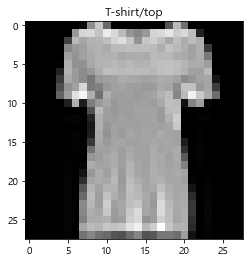

In [79]:
#이미지 확인

idx = 10 #이 숫자를 마음대로 변경하여 값들을 살펴보자.
x,y = fmnist_trainset[idx] #Dataset[i]:(X,y)

plt.imshow(x[0],cmap='gray')
plt.title(index_to_class[y])
plt.show()

In [80]:
x.shape

torch.Size([1, 28, 28])

In [81]:
y #의류의 종류를 이야기해주는.....

0

In [82]:
#dataloader
#train이느냐 test이느냐에 따라서 코드를 따로 코딩하면 된다.


fmnist_trainloader = DataLoader(fmnist_trainset,batch_size=128,shuffle=True,drop_last=True)
fmnist_testloader = DataLoader(fmnist_testset,batch_size=128)

In [85]:
##모델 정의

class FashionMNIST(nn.Module):
    def __init__(self):
        super().__init__()
        #입력 이미지를 받아서 처리후 리턴====입력 이미지의 feature수만큼!(28*28=784)
        #가면 갈수록 feature 수를 줄이는 이유는, 전체 이미지 중에서 핵심적인 부분만 찾기 위해서 이렇게 하는 것이다.
        self.lr1 = nn.Linear(784,2048) #784-> 2048
        self.lr2 = nn.Linear(2048,1024) #2048-> 1024
        self.lr3 = nn.Linear(1024,512) #1024->512
        self.lr4 = nn.Linear(512,256) #512->256
        self.lr5 = nn.Linear(256,128) #256->128
        self.lr6 = nn.Linear(128,64) #128->64
        
        
        #output----옷 종류(정답 클래스 개수)의 수에 맞춘다.
        self.lr7 = nn.Linear(64,10) #각 클래스별 확률이 출력이 되도록 한다.
    def forward(self,X):
        #X -> (batch,channel,height,width) ==> (batch,all_feature)
        #out = torch.flatten(X,start_dim=1)
        out = nn.Flatten()(X)
        
        
        out = nn.ReLU()(self.lr1(out))
        out = nn.ReLU()(self.lr2(out))
        out = nn.ReLU()(self.lr3(out))
        out = nn.ReLU()(self.lr4(out))
        out = nn.ReLU()(self.lr5(out))
        out = nn.ReLU()(self.lr6(out))
        ##output
        out = self.lr7(out)
        
        
        return out
        #lr1 ~ lr7
        ## forward 처리를 구현한다. => Linear -> ReLU()
        #lr6까지는 처리를 해 주고, 7은 하지 말자......
    
    
    

In [86]:
#모델 생성 및 확인

f_model = FashionMNIST()
print(f_model)

FashionMNIST(
  (lr1): Linear(in_features=784, out_features=2048, bias=True)
  (lr2): Linear(in_features=2048, out_features=1024, bias=True)
  (lr3): Linear(in_features=1024, out_features=512, bias=True)
  (lr4): Linear(in_features=512, out_features=256, bias=True)
  (lr5): Linear(in_features=256, out_features=128, bias=True)
  (lr6): Linear(in_features=128, out_features=64, bias=True)
  (lr7): Linear(in_features=64, out_features=10, bias=True)
)


In [87]:
#요약
#파라미터가 얼마나 많은지, 그리고 어떻게 줄어 드는지도 잘 파악을 하자.
torchinfo.summary(f_model,(128,1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNIST                             [128, 10]                 --
├─Linear: 1-1                            [128, 2048]               1,607,680
├─Linear: 1-2                            [128, 1024]               2,098,176
├─Linear: 1-3                            [128, 512]                524,800
├─Linear: 1-4                            [128, 256]                131,328
├─Linear: 1-5                            [128, 128]                32,896
├─Linear: 1-6                            [128, 64]                 8,256
├─Linear: 1-7                            [128, 10]                 650
Total params: 4,403,786
Trainable params: 4,403,786
Non-trainable params: 0
Total mult-adds (M): 563.68
Input size (MB): 0.40
Forward/backward pass size (MB): 4.14
Params size (MB): 17.62
Estimated Total Size (MB): 22.16

In [61]:
### 모델 추정결과 형태를 확인

i = torch.ones((2,1,28,28)) #1*28*28 이미지 2장
y_hat = f_model(i)
y_hat[0] #첫번째 이미지에 대한 추론 결과

tensor([-0.0651, -0.0287,  0.0562, -0.0465,  0.0577,  0.0876,  0.0387, -0.0428,
         0.1424,  0.0672], grad_fn=<SelectBackward0>)

In [62]:
y_hat[0].shape


#정답 class =>    예측결과 10중에서 가장 큰 값이 있는 index
y_hat.argmax(axis=-1 ) #첫번째에 관한 예측: 5,두번째도 5임.

index_to_class[y_hat.detach().numpy().argmax(axis=-1)] #detach 메소드로 잘 보도록 하자.
#requires_grad=True인 Tensor를 ndarray로 변환할 때는
## tensor.detach()를 한 다음 변환해야 한다.



array(['Bag', 'Bag'], dtype='<U11')

In [63]:
#y_hat =>확률값으로 변환 ====>Softmax()
y_hat_probabiity = nn.Softmax(dim=0)(y_hat) #다 합치면 1이다. 각 종류의 옷일 확률을 구하는 것이다.


In [64]:
y_hat_probabiity.max(dim=-1).values,y_hat_probability.argmax(dim=-1)

NameError: name 'y_hat_probability' is not defined

In [88]:
###학습(train)


LR=0.001
N_EPOCH=200


#모델을 device로 이동한다.
f_model = f_model.to(device)



#loss fn ==>다중분류

loss_fn = nn.CrossEntropyLoss() #다중 분류용 log loss

#optimizer
optimizer = torch.optim.Adam(f_model.parameters(),lr=LR)


In [91]:
# train
import time
N_EPOCH=20
## 각 에폭별 학습이 끝나고 모델 평가한 값을 저장.
train_loss_list = []
valid_loss_list = []
valid_acc_list = []   # test set의 정확도 검증 결과 => 전체데이터 중 맞은데이터의 개수
s = time.time()
for epoch in range(N_EPOCH):
    ######### train
    f_model.train()
    train_loss = 0.0 # 현재 epoch의 tain set의 loss
    for X_train, y_train in fmnist_trainloader:
        # 1. device로 옮기기. model과 같은 device로 옮긴다.
        X_train, y_train = X_train.to(device), y_train.to(device)
        # 2. 예측 - 순전파
        pred_train = f_model(X_train)
        # 3. Loss 계산
        loss = loss_fn(pred_train, y_train) # (예측, 정답)
        # 4 모델 파라미터 업데이트
        ## 4-1 gradient 초기화
        optimizer.zero_grad()
        ## 4-2 grad 계산 - (오차) 역전파
        loss.backward()
        ## 4-3 파라미터 업데이트
        optimizer.step()
        # train loss를 누적
        train_loss += loss.item()
    # 1에폭 학습 종료 => train_loss의 평균을 list에 저장.
    train_loss /= len(fmnist_trainloader)  # 누적_train_loss/step수
    train_loss_list.append(train_loss)
    ######### validation
    f_model.eval()
    valid_loss = 0.0  # 현재 epoch의 validation loss 저장할 변수
    valid_acc = 0.0   # 현재 epoch의 validation accuracy(정확도)를 저장할 변수
    ### 정확도: 맞은것의 개수 / 전체 개수
    with torch.no_grad(): # 도함수 구할 필요가 없으므로 no grad context manager에서 실행.
        for X_valid, y_valid in fmnist_testloader:
            # 1. device로 옮기기
            X_valid, y_valid = X_valid.to(device), y_valid.to(device)
            # 2. 예측
            pred_valid = f_model(X_valid) # class별 정답일 가능성을 출력 (batch, 10)
            pred_label = pred_valid.argmax(dim=-1) # 정답 class를 조회. (pred_valid에서 가장 큰값을 가진 index)
            # 3. 평가
            ## 3.1 loss 계산
            loss_valid = loss_fn(pred_valid, y_valid) ## loss_fn() batch만큼 평균을 계산.
            valid_loss += loss_valid
            ## 3.2 정확도 계산
            valid_acc += torch.sum(pred_label == y_valid).item()
        # 한 epoch에 대한 평가 완료 => valid_loss_list, valid_acc_list에 추가
        valid_loss /= len(fmnist_testloader)        # step수로 나눠서 평균을 계산
        valid_acc /= len(fmnist_testloader.dataset) # testset의 총 데이터 개수로 나눔.
        valid_loss_list.append(valid_loss)
        valid_acc_list.append(valid_acc)
        print(f"[{epoch+1:02d}/{N_EPOCH}] train loss: {train_loss} valid loss: {valid_loss} valid acc: {valid_acc}")
e = time.time()
    
#정확도는 뭐 한 89퍼센트 정도 나오는 것 같다.


[01/20] train loss: 0.6420736354895127 valid loss: 0.4506871700286865 valid acc: 0.8361
[02/20] train loss: 0.3995607113226866 valid loss: 0.3963545560836792 valid acc: 0.8563
[03/20] train loss: 0.35227826371406895 valid loss: 0.3863133192062378 valid acc: 0.8627
[04/20] train loss: 0.3269052625211895 valid loss: 0.35392794013023376 valid acc: 0.8726
[05/20] train loss: 0.301582530936879 valid loss: 0.3552477955818176 valid acc: 0.8727
[06/20] train loss: 0.28805436805272716 valid loss: 0.3504869341850281 valid acc: 0.8732
[07/20] train loss: 0.2767181450294124 valid loss: 0.40548890829086304 valid acc: 0.8591
[08/20] train loss: 0.2683854476891012 valid loss: 0.3577542006969452 valid acc: 0.8754
[09/20] train loss: 0.2504744268157798 valid loss: 0.3477397859096527 valid acc: 0.8761
[10/20] train loss: 0.24078787399981266 valid loss: 0.3279939591884613 valid acc: 0.8852
[11/20] train loss: 0.23128276300799644 valid loss: 0.3358825147151947 valid acc: 0.8866
[12/20] train loss: 0.21834

KeyboardInterrupt: 

In [90]:
valid_loss_list = [v.item() for v in valid_loss_list]
valid_loss_list

AttributeError: 'float' object has no attribute 'item'

NameError: name 'valid_acc_list' is not defined

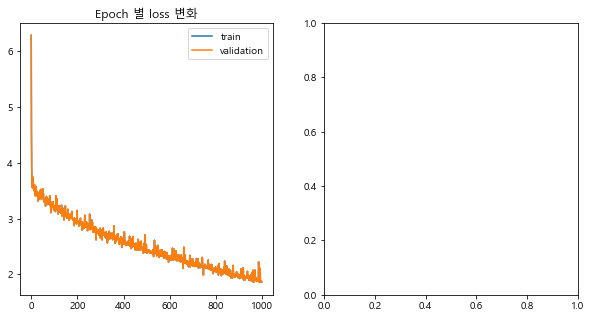

In [89]:
#결과 시각화
#loss는 내려갈 수록 즣은거고, valid는 올라갈 수록 좋다.
#허나, 중요한 것은 과대적합이 나올 수도 있다는 것이다. 그래서 중간에 끊어주는 것이 중요하다.
#그리고, loss나 정확도가 왔다리갔다리 하는 경우가 많다.
#그 중에서 성능이 가장 좋은 놈을 찾는게 중요한데.... 그 놈을 찾는 것도 감이고 실력이다.
#근데..... 특정 시점에서 더 이상 정확도 등이 획기적으로 개선되지 않으면 중간에 종료시키는 것도 중요하다.


plt.rcParams["font.family"] = "Malgun gothic"

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_loss_list,label="train")
plt.plot(train_loss_list,label="validation")
plt.title("Epoch 별 loss 변화")
plt.legend()


plt.subplot(1,2,2)
plt.plot(valid_acc_list)
plt.title("Validation Accuracy")

plt.tight_layout()
plt.show()

In [70]:
#모델 학습이 진행이 되면 어느 시점부터는 성능이 떨어지기 시작한다.
#학습도중 성능 개선될 때마다 저장.(가장 좋은 성능의 모델을 서비스 할 수 있게한다.)


#1. 학습 도중 성능이 개선 될 때마다 저장한다.
#2. 더 이상 성능이 개선이 안되면 학습을 중지한다.

In [72]:
import time
LR = 0.001
N_EPOCH = 1000
# 모델을 device 로 이동.
f_model = FashionMNIST()
f_model = f_model.to(device)
# loss fn -> 다중분류: nn.CrossEntropyLoss() ==> 다중 분류용 Log loss
loss_fn = nn.CrossEntropyLoss()
# optimizer
optimizer = torch.optim.Adam(f_model.parameters(), lr=LR)
########################################
# 조기종료 + 모델 저장을 위한 변수 추가
########################################
###### 모델 저장을 위한변수
# 학습 중 가장 좋은 성능 평가지표를 저장. 현 epoch의 지표가 이 변수값보다 좋으면 저장
# 평가지표: validation loss
best_score = torch.inf
save_model_path = "models/fashion_mnist_best_model.pth"
###### 조기 종료를 위한 변수: 특정 epoch동안 성능 개선이 없으면 학습을 중단
patience = 5 # 성능이 개선 될지를 기다릴 epoch 수. patience 번 만큼 개선이 안되면 중단.(보통 10이상 지정)
trigger_cnt = 0 # 성능 개선을 몇번 째 기다리는 지 정할 변수. patience==trigger_cnt : 중단
# train
## 각 에폭별 학습이 끝나고 모델 평가한 값을 저장.
train_loss_list = []
valid_loss_list = []
valid_acc_list = []   # test set의 정확도 검증 결과 => 전체데이터 중 맞은데이터의 개수
s = time.time()
for epoch in range(N_EPOCH):
    ######### train
    f_model.train()
    train_loss = 0.0 # 현재 epoch의 tain set의 loss
    for X_train, y_train in fmnist_trainloader:
        # 1. device로 옮기기. model과 같은 device로 옮긴다.
        X_train, y_train = X_train.to(device), y_train.to(device)
        # 2. 예측 - 순전파
        pred_train = f_model(X_train)
        # 3. Loss 계산
        loss = loss_fn(pred_train, y_train) # (예측, 정답)
        # 4 모델 파라미터 업데이트
        ## 4-1 gradient 초기화
        optimizer.zero_grad()
        ## 4-2 grad 계산 - (오차) 역전파
        loss.backward()
        ## 4-3 파라미터 업데이트
        optimizer.step()
        # train loss를 누적
        train_loss += loss.item()
    # 1에폭 학습 종료 => train_loss의 평균을 list에 저장.
    train_loss /= len(fmnist_trainloader)  # 누적_train_loss/step수
    train_loss_list.append(train_loss)
    ######### validation
    f_model.eval()
    valid_loss = 0.0  # 현재 epoch의 validation loss 저장할 변수
    valid_acc = 0.0   # 현재 epoch의 validation accuracy(정확도)를 저장할 변수
    ### 정확도: 맞은것의 개수 / 전체 개수
    with torch.no_grad(): # 도함수 구할 필요가 없으므로 no grad context manager에서 실행.
        for X_valid, y_valid in fmnist_testloader:
            # 1. device로 옮기기
            X_valid, y_valid = X_valid.to(device), y_valid.to(device)
            # 2. 예측
            pred_valid = f_model(X_valid) # class별 정답일 가능성을 출력 (batch, 10)
            pred_label = pred_valid.argmax(dim=-1) # 정답 class를 조회. (pred_valid에서 가장 큰값을 가진 index)
            # 3. 평가
            ## 3.1 loss 계산
            loss_valid = loss_fn(pred_valid, y_valid) ## loss_fn() batch만큼 평균을 계산.
            valid_loss += loss_valid.item()
            ## 3.2 정확도 계산
            valid_acc += torch.sum(pred_label == y_valid).item()
        # 한 epoch에 대한 평가 완료 => valid_loss_list, valid_acc_list에 추가
        valid_loss /= len(fmnist_testloader)        # step수로 나눠서 평균을 계산
        valid_acc /= len(fmnist_testloader.dataset) # testset의 총 데이터 개수로 나눔.
        valid_loss_list.append(valid_loss)
        valid_acc_list.append(valid_acc)
        print(f"[{epoch+1:02d}/{N_EPOCH}] train loss: {train_loss} valid loss: {valid_loss} valid acc: {valid_acc}")
    ##################################
    # 조기종료여부, 모델 저장 처리
    #   저장: 현 epoch valid_loss 가 best_score 보다 개선된 경우 저장(작으면 개선)
    #################################
    if valid_loss < best_score: # 성능이 개선된 경우.
        #저장 로그 출력
        print(f"====> 모델저장:  {epoch+1} Epoch - 이전 valid_loss: {best_score}, 현재 valid_loss: {valid_loss}")
        # best_score교체
        best_score = valid_loss
        # 저장
        torch.save(f_model, save_model_path)
        # trigger_cnt 를 0으로 초기화
        trigger_cnt = 0
    else: # 성능개선이 안된경우.
        # trigger_cnt를 1 증가
        trigger_cnt += 1
        if patience == trigger_cnt: # patience 만큼 대기 ==> 조기 종료
            #로그
            print(f"=====> {epoch+1} Epoch에서 조기종료-{best_score}에서 개선 안됨")
            break
e = time.time()

[01/1000] train loss: 0.6496741068032053 valid loss: 0.4531976199602779 valid acc: 0.8362
====> 모델저장:  1 Epoch - 이전 valid_loss: inf, 현재 valid_loss: 0.4531976199602779
[02/1000] train loss: 0.3880012427958158 valid loss: 0.4072249775068669 valid acc: 0.8586
====> 모델저장:  2 Epoch - 이전 valid_loss: 0.4531976199602779, 현재 valid_loss: 0.4072249775068669
[03/1000] train loss: 0.352161408521426 valid loss: 0.36911332965651644 valid acc: 0.8698
====> 모델저장:  3 Epoch - 이전 valid_loss: 0.4072249775068669, 현재 valid_loss: 0.36911332965651644
[04/1000] train loss: 0.321003187320426 valid loss: 0.3762322586925724 valid acc: 0.8652
[05/1000] train loss: 0.3025762515986322 valid loss: 0.35094515847254404 valid acc: 0.8764
====> 모델저장:  5 Epoch - 이전 valid_loss: 0.36911332965651644, 현재 valid_loss: 0.35094515847254404
[06/1000] train loss: 0.28432955529190534 valid loss: 0.34837701633761203 valid acc: 0.8805
====> 모델저장:  6 Epoch - 이전 valid_loss: 0.35094515847254404, 현재 valid_loss: 0.34837701633761203
[07/1000

In [73]:
##  저장된 모델을 로딩

best_model = torch.load(save_model_path)

In [ ]:
### test_dataloader로 평가한다.

#### test_dataloader 로 평가
best_model = best_model.to(device)
best_model.eval()
valid_loss = 0.0  # 현재 epoch의 validation loss 저장할 변수
valid_acc = 0.0   # 현재 epoch의 validation accuracy(정확도)를 저장할 변수
### 정확도: 맞은것의 개수 / 전체 개수
with torch.no_grad(): # 도함수 구할 필요가 없으므로 no grad context manager에서 실행.
    for X_valid, y_valid in fmnist_testloader:
        # 1. device로 옮기기
        X_valid, y_valid = X_valid.to(device), y_valid.to(device)

        # 2. 예측
        pred_valid = best_model(X_valid) # class별 정답일 가능성을 출력 (batch, 10)
        pred_label = pred_valid.argmax(dim=-1) # 정답 class를 조회. (pred_valid에서 가장 큰값을 가진 index)

        # 3. 평가
        ## 3.1 loss 계산
        loss_valid = loss_fn(pred_valid, y_valid) ## loss_fn() batch만큼 평균을 계산.
        valid_loss += loss_valid.item()
        ## 3.2 정확도 계산
        valid_acc += torch.sum(pred_label == y_valid).item()
    # 한 epoch에 대한 평가 완료 => valid_loss_list, valid_acc_list에 추가
    valid_loss /= len(fmnist_testloader)        # step수로 나눠서 평균을 계산
    valid_acc /= len(fmnist_testloader.dataset) # testset의 총 데이터 개수로 나눔

## 위스콘신 유방암 데이터셋 - 이진분류(Binary Classification) 문제

- **이진 분류 문제 처리 모델의 두가지 방법**
    1. positive(1)일 확률을 출력하도록 구현
        - output layer: units=1, activation='sigmoid'
        - loss: binary_crossentropy
    2. negative(0)일 확률과 positive(1)일 확률을 출력하도록 구현 => 다중분류 처리 방식으로 해결
        - output layer: units=2, activation='softmax', y(정답)은 one hot encoding 처리
        - loss: categorical_crossentropy
        
- 위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
- Feature
    - 종양에 대한 다양한 측정값들
- Target의 class
    - 0 - malignant(악성종양)
    - 1 - benign(양성종양)

In [ ]:
#주의! 양성이라는 것이 마냥 긍정적인 의미는 아니다. 
#왜 코로나도 음성이 좋은 거니까.

In [1]:
from sklearn.datasets import load_breast_cancer
#관련 데이터에 관한 것을 import 한다.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt



In [2]:
device = "cpu" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Dataset, DataLoader 생성


In [3]:
X,y = load_breast_cancer(return_X_y=True)
print(type(X),type(y))
print(X.shape,y.shape)
print(np.unique(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(569, 30) (569,)
[0 1]


In [4]:
index_to_class = np.array(["악성","양성"])
class_to_index = dict(악성=0,양성=1)



In [5]:
# y shape을 2차원으로 변경한다. ===> 모델 출력 shape와 맞춰준다.
# (batch size,1)


y = y.reshape(-1,1)
y.shape

(569, 1)

In [7]:
### train/test set 분리
X_train, X_test, y_train, y_test = train_test_split(X,y, #나눌 대상 X,y
                                                   test_size=0.25, #비율을 정한다.
                                                   stratify=y #클래스 별 비율을 맞춰서 나눈다.
                                                   ) 


print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(426, 30) (143, 30) (426, 1) (143, 1)


In [8]:
## 전처리 - Feature Scaling (컬럼들의 scale을 맞춘다.)


#StandardScaler ===> 평균:0, 표준편차 :1 을 기준으로 맞춘다.


scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) #trainset으로 fit한 scaler를 이용해 변환.



In [22]:
#### ndarray => Tensor 변환 =====> dataset을 구성 =====> dataloader 구성


#ndarray =>torch.Tensor
X_train_tensor = torch.tensor(X_train_scaled,dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled,dtype=torch.float32)
print(X_test_tensor)
print(X_test_tensor.shape)
y_train_tensor = torch.tensor(y_train,dtype=torch.float32)
y_test_tensor = torch.tensor(y_test,dtype=torch.float32)



tensor([[ 0.9399,  0.8737,  0.8065,  ..., -0.4851, -0.7890, -1.0267],
        [-0.7053, -0.2145, -0.6901,  ...,  0.1044, -0.1963,  0.3647],
        [ 0.1274, -1.2153,  0.0906,  ..., -0.1183, -0.5312, -0.3288],
        ...,
        [ 0.2628, -0.8633,  0.2405,  ...,  0.3449,  0.0515, -0.0314],
        [-0.5728, -0.3548, -0.5689,  ..., -0.7793,  0.2106, -0.7217],
        [ 0.7757, -0.1064,  0.7355,  ...,  0.4869, -0.1896, -0.6425]])
torch.Size([143, 30])


In [24]:
# Dataset 생성 ==> 매모리의 tensor를 dataset으로 생성 => tensordataset
#TensorDataset을 활용하면 더 쉽게 data를 구분할 수 있다.

trainset = TensorDataset(X_train_tensor,y_train_tensor)
testset = TensorDataset(X_test_tensor,y_test_tensor)




#dataloader
train_loader = DataLoader(trainset, batch_size=200, shuffle=True, drop_last=True)
test_loader = DataLoader(testset, batch_size=len(testset))



### Model 클래스 정의


In [13]:
X_train.shape

(426, 30)

In [14]:
class BCModel(nn.Module):
    
    
    def __init__(self):
        
        super().__init__()
        self.lr1 = nn.Linear(30,32)
        self.lr2 = nn.Linear(32,8)
        #출력 layer: 이진 분류 - positive의 확률 값 한 개를 출력한다.
        self.lr3 = nn.Linear(8,1)
        
        
    def forward(self,X):
        
        
        # X (입력) shape: (batchsize,30)
        #out = self.lr1(X)
        #out = nn.ReLU(out)
        out = nn.ReLU()(self.lr1(X)) #이런 식으로 해도 된다.
        out = nn.ReLU()(self.lr2(out))
        
        #이진분류 출력값 처리 ->Linear()는 한 개의 값을 출력한다. =>확률값으로 변경한다. ==> Sigmoid 함수를 Activation 함수로 사용한다.
        out = self.lr3(out)
        out = nn.Sigmoid()(out)
        return out
        
        
    
        
        
        
        
        

In [20]:
model = BCModel()
tmp_x = torch.ones(5,30)
print(tmp_x.shape)
tmp_y = model(tmp_x)
tmp_y

#0.xxxx->1(양성)일 확률

torch.Size([5, 30])


tensor([[0.3961],
        [0.3961],
        [0.3961],
        [0.3961],
        [0.3961]], grad_fn=<SigmoidBackward0>)

In [17]:
#일정 값보다 더 큰지/작은지를 파악하는 것이 좋다.


#tensor객체.type(타입을 지정) ===> Tensor 데이터타입을 반환.
# bool -> int : False: 0, True :1 

(tmp_y>0.5).type(torch.int32)

tensor([[1],
        [1],
        [1],
        [1],
        [1]], dtype=torch.int32)

### Train


In [50]:
#모델 생성
import time
#하이퍼파라미터
LR=0.001
N_EPOCH=1000


model = BCModel().to(device)
#loss 함수
loss_fn = nn.BCELoss() #binary cross entropy loss

# optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=LR)



s=time.time()
######################################################
#에폭별 검증 : train loss, validation loss, validation accuracy
#조기종료(early stop) -성능 개선이 안되면 학습을 중단한다.
#가장 좋은 성능을 내는 에폭의 모델을 저장.
# 조기종료/모델 저장 ==>validation loss 기준.



#결과 정할 리스트
train_loss_list,valid_loss_list,valid_acc_list =[],[],[]


###모델 저장, 조기종료 관련 변수
best_score = torch.inf #validation loss
save_bcmodel_path = "models/bc_best_model.pth"

patience = 20 #20번 정도는 기다려 보지 뭐.
#성능이 개선 될 때까지 몇 에폭 기다릴 것인지....


trigger_cnt = 0
#성능이 개선 될 때까지 현재 몇 번째 기다렸는지. 






for epoch in range(N_EPOCH):
    
    #train
    model.train()
    train_loss=0.0
    
    
    #step
    for X_train,y_train in train_loader:
        X_train,y_train = X_train.to(device),y_train.to(device)
        #예측
        pred_train =model(X_train) #예측
        loss = loss_fn(pred_train, y_train) #오차 계산
        
        
        
        #파라미터 업데이트 
        optimizer.zero_grad() #초기화
        loss.backward() #grad 계산
        optimizer.step() #파라미터 update
        
        train_loss+=loss.item()
    train_loss /= len(train_loader) #현재 epoch의 평균 train loss 계산.
        
        
        
        
    ###vaildation
    model.eval()
    valid_loss,valid_acc =0.0,0.0
    
    with torch.no_grad():
        for X_valid,y_valid in test_loader:
            X_valid,y_valid = X_valid.to(device),y_valid.to(device)
            pred_valid = model(X_valid) #값 1개 - positive일 확률
            pred_label = (pred_valid >= 0.5).type(torch.int32) #label ==>정확도 계산
            
            
            
            #loss
            loss_valid = loss_fn(pred_valid,y_valid)
            valid_loss += loss_valid.item()
            
            #정확도
            valid_acc += torch.sum(pred_label == y_valid).item()
    
    
    #valid 검증 결과 계산
    valid_loss /= len(test_loader)
    valid_acc /= len(test_loader.dataset)
    
    
    
    print(f"[{epoch+1}/{N_EPOCH}] train loss: {train_loss}, valid loss: {valid_loss}, valid accuracy: {valid_acc}")
    
    #데이터를 저장한다.
    train_loss_list.append(train_loss)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    ### 모델 저장 및 조기종료 처리
    
    if valid_loss < best_score: # 성능 개선
        print(f"======> {epoch+1}에폭에서 모델 저장. 이전 score: {best_score}, 현재 score: {valid_loss}")
        torch.save(model,save_bcmodel_path)
        best_score = valid_loss
        trigger_cnt = 0
    else: #성능개선이 되지 않았다는 이야기이다.
        trigger_cnt += 1
        if patience == trigger_cnt:
            print(f"########### Early Stop: {epoch+1}")
            #이렇게 하면, 언제 중단을 했는지 알 수 있다.
            break

e=time.time()
print(f"학습시간: {e-s}초")








[1/1000] train loss: 0.6575140953063965, valid loss: 0.6532841324806213, valid accuracy: 0.7552447552447552
======> 1에폭에서 모델 저장. 이전 score: inf, 현재 score: 0.6532841324806213
[2/1000] train loss: 0.6452004909515381, valid loss: 0.6390107870101929, valid accuracy: 0.7692307692307693
======> 2에폭에서 모델 저장. 이전 score: 0.6532841324806213, 현재 score: 0.6390107870101929
[3/1000] train loss: 0.6319022476673126, valid loss: 0.6254581212997437, valid accuracy: 0.8041958041958042
======> 3에폭에서 모델 저장. 이전 score: 0.6390107870101929, 현재 score: 0.6254581212997437
[4/1000] train loss: 0.6191753149032593, valid loss: 0.6124215126037598, valid accuracy: 0.8251748251748252
======> 4에폭에서 모델 저장. 이전 score: 0.6254581212997437, 현재 score: 0.6124215126037598
[5/1000] train loss: 0.6060024797916412, valid loss: 0.5997019410133362, valid accuracy: 0.8461538461538461
======> 5에폭에서 모델 저장. 이전 score: 0.6124215126037598, 현재 score: 0.5997019410133362
[6/1000] train loss: 0.5945512652397156, valid loss: 0.5871437191963196, va

[47/1000] train loss: 0.17158369719982147, valid loss: 0.1746346801519394, valid accuracy: 0.951048951048951
======> 47에폭에서 모델 저장. 이전 score: 0.17977644503116608, 현재 score: 0.1746346801519394
[48/1000] train loss: 0.16992470622062683, valid loss: 0.16970349848270416, valid accuracy: 0.958041958041958
======> 48에폭에서 모델 저장. 이전 score: 0.1746346801519394, 현재 score: 0.16970349848270416
[49/1000] train loss: 0.163053996860981, valid loss: 0.16502784192562103, valid accuracy: 0.958041958041958
======> 49에폭에서 모델 저장. 이전 score: 0.16970349848270416, 현재 score: 0.16502784192562103
[50/1000] train loss: 0.15999384224414825, valid loss: 0.16055622696876526, valid accuracy: 0.958041958041958
======> 50에폭에서 모델 저장. 이전 score: 0.16502784192562103, 현재 score: 0.16055622696876526
[51/1000] train loss: 0.15443886816501617, valid loss: 0.15631425380706787, valid accuracy: 0.958041958041958
======> 51에폭에서 모델 저장. 이전 score: 0.16055622696876526, 현재 score: 0.15631425380706787
[52/1000] train loss: 0.1512290015816688

[94/1000] train loss: 0.06895466893911362, valid loss: 0.08189462870359421, valid accuracy: 0.986013986013986
======> 94에폭에서 모델 저장. 이전 score: 0.08241922408342361, 현재 score: 0.08189462870359421
[95/1000] train loss: 0.0627828873693943, valid loss: 0.08139511942863464, valid accuracy: 0.986013986013986
======> 95에폭에서 모델 저장. 이전 score: 0.08189462870359421, 현재 score: 0.08139511942863464
[96/1000] train loss: 0.06655289232730865, valid loss: 0.08091694116592407, valid accuracy: 0.986013986013986
======> 96에폭에서 모델 저장. 이전 score: 0.08139511942863464, 현재 score: 0.08091694116592407
[97/1000] train loss: 0.06586004793643951, valid loss: 0.08047621697187424, valid accuracy: 0.986013986013986
======> 97에폭에서 모델 저장. 이전 score: 0.08091694116592407, 현재 score: 0.08047621697187424
[98/1000] train loss: 0.06564727239310741, valid loss: 0.08004125207662582, valid accuracy: 0.986013986013986
======> 98에폭에서 모델 저장. 이전 score: 0.08047621697187424, 현재 score: 0.08004125207662582
[99/1000] train loss: 0.061896150931

[139/1000] train loss: 0.045743003487586975, valid loss: 0.07433395087718964, valid accuracy: 0.9790209790209791
======> 139에폭에서 모델 저장. 이전 score: 0.07434574514627457, 현재 score: 0.07433395087718964
[140/1000] train loss: 0.04373288340866566, valid loss: 0.07429756224155426, valid accuracy: 0.9790209790209791
======> 140에폭에서 모델 저장. 이전 score: 0.07433395087718964, 현재 score: 0.07429756224155426
[141/1000] train loss: 0.04374771751463413, valid loss: 0.07427441328763962, valid accuracy: 0.9790209790209791
======> 141에폭에서 모델 저장. 이전 score: 0.07429756224155426, 현재 score: 0.07427441328763962
[142/1000] train loss: 0.04494832642376423, valid loss: 0.07425477355718613, valid accuracy: 0.9790209790209791
======> 142에폭에서 모델 저장. 이전 score: 0.07427441328763962, 현재 score: 0.07425477355718613
[143/1000] train loss: 0.04226198233664036, valid loss: 0.07426010072231293, valid accuracy: 0.9790209790209791
[144/1000] train loss: 0.043973423540592194, valid loss: 0.07429669052362442, valid accuracy: 0.9790209

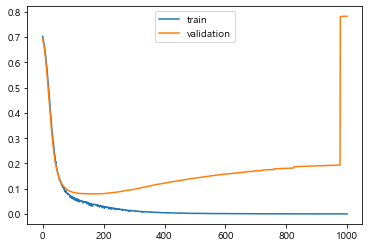

In [48]:
#학습 결과를 그래프로 그려보자.

plt.plot(train_loss_list, label="train")
plt.plot(valid_loss_list, label="validation")

plt.legend()
plt.show()


#보다 보면, validation의 수치가 적어졌다가 확 올라간 것을 알 수 있다. 
#그러므로, 중간에 모델을 stop 하는 것이 중요하다는 것을 알 수 있다.


### 모델 train 결과 확인/평가



In [51]:
best_model = torch.load(save_bcmodel_path)


In [53]:
#모델이 학습한 데이터는 전처리 된 것이다.(standard scaling)
#예측(추론) 할 데이터도 같은 전처리를 해야 한다.



pred_new = best_model(X_test_tensor)
pred_new.shape


torch.Size([143, 1])

In [56]:
pred_new[:5] #뭐, 쉽게 말하면, 확률값 같은 것이다. positive일 확률을 구하는 것이다.

tensor([[0.9980],
        [0.9922],
        [0.0126],
        [0.9998],
        [0.9999]], grad_fn=<SliceBackward0>)

In [57]:
#확률 ->class index

pred_new_label = (pred_new >0.5).type(torch.int32)
pred_new_label[:5]



tensor([[1],
        [1],
        [0],
        [1],
        [1]], dtype=torch.int32)

In [58]:
y_train_tensor[:5]

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [1.]])